# Welcome to Golf Nattapat's portfolio

### Inspiration

I have heard a lot of news that many people have been tricked into transferring money from banking apps to fraudsters. As a result, many people have lost their jobs, and their families are in trouble. For some people, the stolen money is their life savings. What shocked me the most was hearing about youths who have hanged themselves after being deceived into transferring money to fraudsters.

Many times, the media only reminds us to be careful and not give personal information to anyone, or to download suspicious apps onto our phones. However, I think one way that should be dealt with immediately is through the bank's own system.

Unfortunately, financial transaction data is quite scarce in my country, Thailand. Therefore, I have used the following information to shed some light on patterns and ways to protect against scammers. This is the source that I refer to https://www.kaggle.com/datasets/ealaxi/paysim1

# Ask

What types of financial transactions exist? We may be at risk of unwittingly transferring money to fraudsters.

# Process data

In [1]:
# Import library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load data set
df = pd.read_csv('/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv')
df.shape

(6362620, 11)

# Data cleaning

In [3]:
# Check data

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
# Check missing value
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Explore data

#### What types of transactions are fraudulent?

In [6]:
# What types of transactions are fraudulent?

fraund_type = df[(df['isFraud']==1) | (df['isFlaggedFraud']==1)]['type'].unique()
print(f"The types of transactions is fraudulent are {fraund_type}")

The types of transactions is fraudulent are ['TRANSFER' 'CASH_OUT']


Text(0.5, 1.0, '% Fraud from TRANSFER and CASH_OUT type')

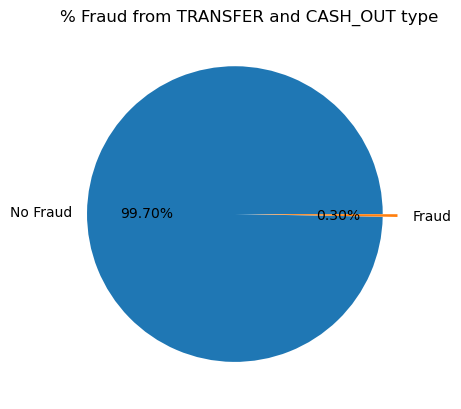

In [7]:
# % Fraud from TRANSFER and CASH_OUT type

df2= df[(df['type'].isin(['TRANSFER','CASH_OUT']))]
forpie = df2['isFraud'].value_counts()
label = ['No Fraud','Fraud']
plt.pie(forpie, labels = label , explode = (0.1, 0), autopct='%1.2f%%')   
plt.title('% Fraud from TRANSFER and CASH_OUT type')

In [8]:
df2.shape

(2770409, 11)

In [9]:
df2.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.0,2719172.89,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0,0
51,1,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.0,8383.29,0,0


#### Check correlation

In [10]:
# Convert 'type' column to integer
df2['type'] = df2['type'].replace("TRANSFER",0).replace("CASH_OUT",1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 253.6+ MB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

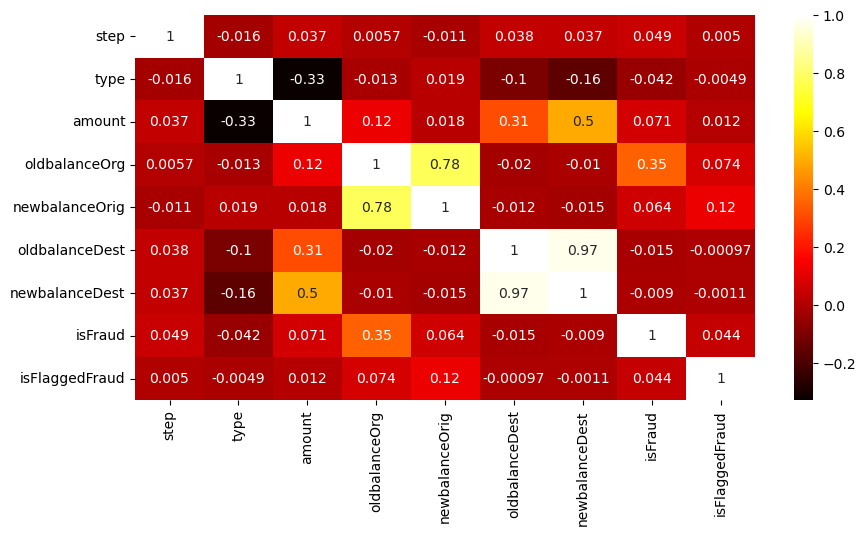

In [11]:
# Correlation
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(),annot=True,cmap='hot')

Many feature are less correlation with `isFraud` target.

In [12]:
# Looking in data of Frauded
df2[df2['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,0,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,0,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,1,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,0,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,0,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,0,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


#### Are `isFlaggedFraud` relate to our `isFraud`?

In [13]:
# Are `isFlaggedFraud` is flag but `isFraud` not flag

df2[(df2['isFraud']==0) & (df2['isFlaggedFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


We have no data on `isFlaggedFraud` is flag but `isFraud` not flag.
So it mean if `isFlaggedFraud` is flag, it alway `isFraud` is flag too.
**I decided that `isFlaggedFraud` is not taken into account.**

#### In most cases, at what `step` are they frauded?

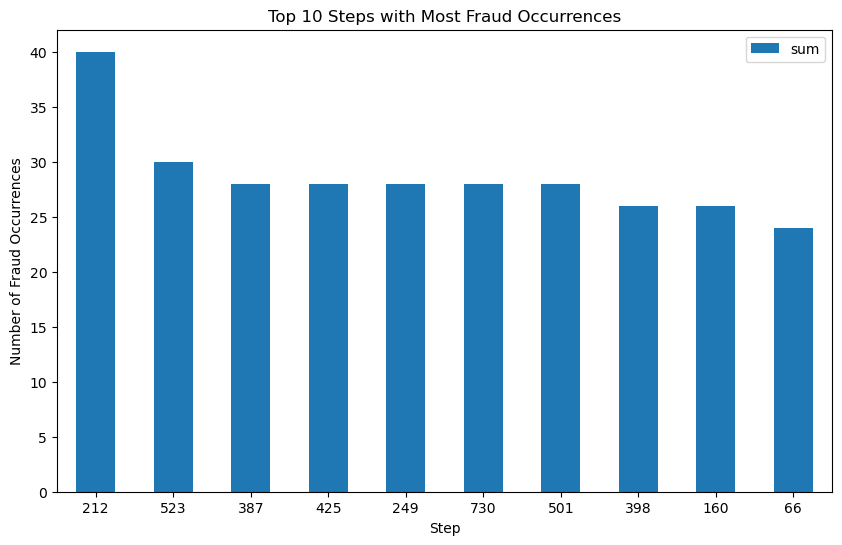

In [14]:
# Data of Fraud by step
data1 = df2[df2['isFraud']==1].groupby('step')['isFraud'].agg(['sum'])\
    .sort_values(by='sum', ascending=False).head(10)

ax = data1.plot.bar(figsize=(10, 6), rot=0)
ax.set_xlabel('Step')
ax.set_ylabel('Number of Fraud Occurrences')
ax.set_title('Top 10 Steps with Most Fraud Occurrences')
plt.show()

In most cases, step 212 (estimate Day 9) are they frauded

#### Person who has been deceived will it be deceived again?

In [15]:
df2[df2['isFraud']==1].groupby('nameOrig')['isFraud'].agg(['sum'])\
    .sort_values(by='sum', ascending=False).head(10)

,sum
nameOrig,
C1000036340,1
C334503836,1
C357089378,1
C356905617,1
C356781229,1
C356706674,1
C356571967,1
C356480504,1
C356205172,1


No,  it not be deceived again

#### Are remain balance after frauded?

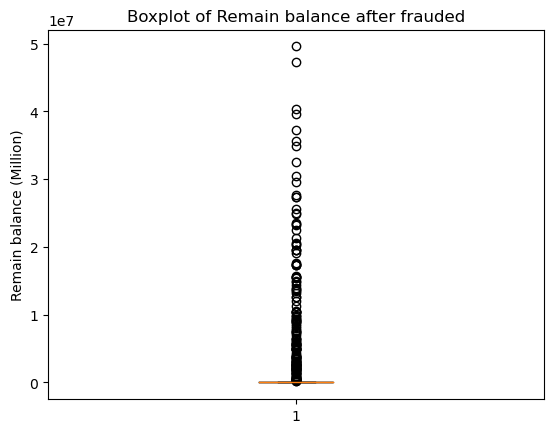

In [16]:
# Boxplote

Orig_after_fraud = df2[df2['isFraud']==1]['newbalanceOrig']
plt.boxplot(Orig_after_fraud)
plt.ylabel('Remain balance (Million)')
plt.title('Boxplot of Remain balance after frauded')
plt.show()

In [17]:
# Median of remain balance after frauded
remain_balance = df2[df2['isFraud']==1]['newbalanceOrig'].median()
print(f"The median of remain balance after frauded is {remain_balance}")

The median of remain balance after frauded is 0.0


Most of the time, victims leave no money in their accounts after being scammed.

#### What is the amount of most scammed money?

In [18]:
# Check basic stat of amount 
df[df['isFraud']==1].groupby('type')['amount'].agg(['min','max','count','median'])

,min,max,count,median
type,,,,
CASH_OUT,0.0,10000000.0,4116,435516.905
TRANSFER,63.8,10000000.0,4097,445705.760


In [19]:
fraud_amount_df = df2[df2['isFraud'] == 1]['amount']

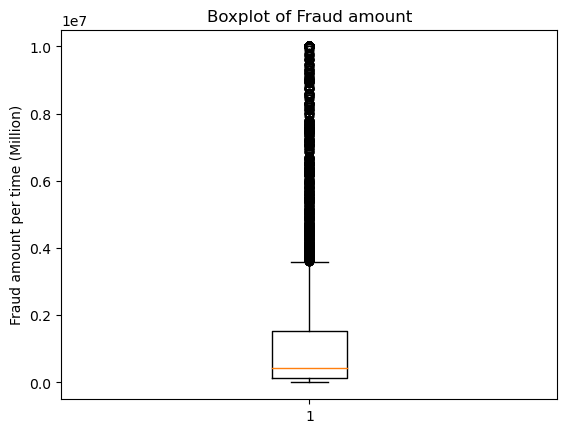

In [20]:
# Boxplote

plt.boxplot(fraud_amount_df)
plt.ylabel('Fraud amount per time (Million)')
plt.title('Boxplot of Fraud amount')
plt.show()

In [21]:

print(f"The median for amount of most scammed money is {fraud_amount_df.median()}")

The median for amount of most scammed money is 441423.44


The median amount scammed is 441423.44, so we can suggest that **if each transaction amounts to more than 400,000, it's considered fraudulent.**

#### Most of the time, how much balance is the destination account before and after doing the scam?

In [22]:
# Delete out-lier data of 'oldbalanceDest' that over 3STD

Old_dest_bal = df2[df2['isFraud'] == 1]['oldbalanceDest']

mean = np.mean(Old_dest_bal)
std = np.std(Old_dest_bal)
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off
Old_dest_bal = [x for x in Old_dest_bal if lower < x < upper]


In [23]:
# Delete out-lier data of 'newbalanceDest' that over 3STD

New_dest_bal = df2[df2['isFraud'] == 1]['newbalanceDest']

mean = np.mean(New_dest_bal)
std = np.std(New_dest_bal)
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off
New_dest_bal = [x for x in New_dest_bal if lower < x < upper]


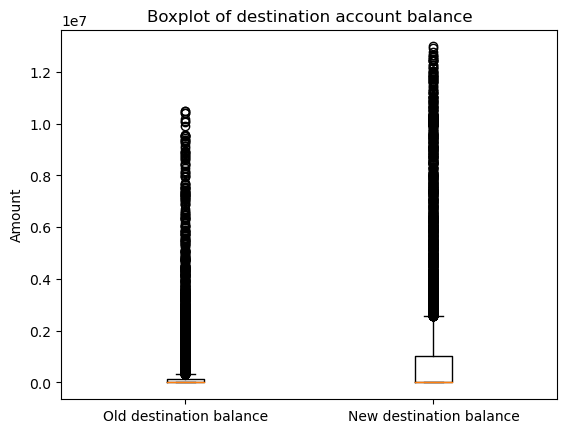

In [24]:

fig, ax = plt.subplots()
ax.boxplot([Old_dest_bal, New_dest_bal])
ax.set_xticklabels(['Old destination balance', 'New destination balance'])
ax.set_ylabel('Amount')
ax.set_title('Boxplot of destination account balance')
plt.show()

In [25]:

print(f"The median for amount of Old balance destination before doing the scam is {np.median(Old_dest_bal)}")
print(f"The median for amount of New balance destination after doing the scam is {np.median(New_dest_bal)}")

The median for amount of Old balance destination before doing the scam is 0.0
The median for amount of New balance destination after doing the scam is 0.0


This means that most scammers. There was no money in the account before the scam started. And when deceiving the victim, it may be withdrawn immediately. Therefore, extra caution should be considered for accounts with no funds at all.

# Machine learning

### Split data

In [26]:
# Check data
df2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,0,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,1,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,1,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,0,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,0,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [27]:
# X = feature variables, y = a target variable
X = df2.drop(['nameOrig','nameDest','isFraud','isFlaggedFraud'], axis=1)
y = df2['isFraud']
print(X.shape)
print(y.shape)

(2770409, 7)
(2770409,)


In [28]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (2216327, 7)
y_train: (2216327,)
X_test:  (554082, 7)
y_test:  (554082,)


### Model fitting

In [29]:
# DecisionTree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)

# Evaluate model
dt_train_pred = dt_model.predict(X_train)
dt_train_acc = accuracy_score(y_train, dt_train_pred)
print(f"Accuracy of DecisionTree model from train data : {dt_train_acc}")

Accuracy of DecisionTree model from train data : 1.0


In [30]:
# K-Nearest Neighbors (KNN) Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

# Evaluate model
knn_train_pred = knn_model.predict(X_train)
knn_train_acc = accuracy_score(y_train, knn_train_pred)
print(f"Accuracy of K-Nearest Neighbors model from train data : {knn_train_acc}")

Accuracy of K-Nearest Neighbors model from train data : 0.9991409209922543


In [31]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5, random_state=42)
rf_model = rf.fit(X_train, y_train)

# Evaluate model
rf_train_pred = rf_model.predict(X_train)
rf_train_acc = accuracy_score(y_train, rf_train_pred)
print(f"Accuracy of K-Nearest Neighbors model from train data : {rf_train_acc}")

Accuracy of K-Nearest Neighbors model from train data : 0.9998777256244228


### Model evaluation

In [32]:
# DecisionTree Classifier
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred, average='micro')
dt_rec = recall_score(y_test, dt_pred, average='micro')
dt_f1 = f1_score(y_test, dt_pred, average = 'micro')


print(f"DecisionTree Accuracy score: {round(dt_acc,2)}")
print(f"DecisionTree Precision score: {round(dt_prec,2)}")
print(f"DecisionTree Recall score: {round(dt_rec,2)}")
print(f"DecisionTree F1 score: {round(dt_f1,2)}")

DecisionTree Accuracy score: 1.0
DecisionTree Precision score: 1.0
DecisionTree Recall score: 1.0
DecisionTree F1 score: 1.0


In [33]:
# K-Nearest Neighbors (KNN) Classifier
knn_pred = knn_model.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred, average='micro')
knn_rec = recall_score(y_test, knn_pred, average='micro')
knn_f1 = f1_score(y_test, knn_pred, average = 'micro')


print(f"K-Nearest Neighbors Accuracy score: {round(knn_acc,2)}")
print(f"K-Nearest Neighbors Precision score: {round(knn_prec,2)}")
print(f"K-Nearest Neighbors Recall score: {round(knn_rec,2)}")
print(f"K-Nearest Neighbors F1 score: {round(knn_f1,2)}")

K-Nearest Neighbors Accuracy score: 1.0
K-Nearest Neighbors Precision score: 1.0
K-Nearest Neighbors Recall score: 1.0
K-Nearest Neighbors F1 score: 1.0


In [34]:
# Random Forest Classifier
rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred, average='micro')
rf_rec = recall_score(y_test, rf_pred, average='micro')
rf_f1 = f1_score(y_test, rf_pred, average = 'micro')


print(f"Random Forest Accuracy score: {round(rf_acc,2)}")
print(f"Random Forest Precision score: {round(rf_prec,2)}")
print(f"Random Forest Recall score: {round(rf_rec,2)}")
print(f"Random Forest F1 score: {round(rf_f1,2)}")

Random Forest Accuracy score: 1.0
Random Forest Precision score: 1.0
Random Forest Recall score: 1.0
Random Forest F1 score: 1.0


In [35]:
# Compare score
compare_score = pd.DataFrame({'Score': ['Accuracy', 'Precision', 'Recall','F1']\
                              ,'DecisionTree': [round(dt_acc,2),round(dt_prec,2),round(dt_rec,2),round(dt_f1,2)]\
                             ,'KNN': [round(knn_acc,2),round(knn_prec,2),round(knn_rec,2),round(knn_f1,2)]\
                             ,'Random Forest': [round(rf_acc,2),round(rf_prec,2),round(rf_rec,2),round(rf_f1,2)]})
compare_score

,Score,DecisionTree,KNN,Random Forest
0,Accuracy,1.0,1.0,1.0
1,Precision,1.0,1.0,1.0
2,Recall,1.0,1.0,1.0
3,F1,1.0,1.0,1.0


From the scores of each model, the predictions of the three models. The accuracy is accurate to 100%. This is a rather surprising and somewhat unreasonable result in reality.

### Deep checking

In [36]:
# Compare result  

# create Pandas Series from the NumPy arrays
predicted_series = pd.Series(dt_pred, name="Predicted")
true_series = pd.Series(y_test, name="True")

# concatenate the two Series horizontally into a DataFrame
result = pd.concat([predicted_series, true_series], axis=1)

pd.DataFrame(result)

,Predicted,True
0,0.0,NaN
1,0.0,NaN
2,0.0,NaN
3,0.0,1.0
4,0.0,NaN
...,...,...
6362608,NaN,1.0
6362609,NaN,1.0
6362612,NaN,1.0
6362615,NaN,1.0


In [37]:
# Check ratio of Fraud
df3=pd.DataFrame(y_test)
fraud_pct = round((df3['isFraud'].value_counts()[1]/(df3['isFraud'].value_counts()[1]+df3['isFraud'].value_counts()[0]))*100,2)
print(f"Ratio of Fraud is {fraud_pct}%")

Ratio of Fraud is 0.3%


After further analysis, we found that sometimes the prediction results were not yet deceived (0) while were actually deceived (1), indicating that, The result of the model is 100% accurate still not as accurate as it should be. This is because the number of data considered fraudulent(1) is only 0.3% of the test dataset, which is very small.

# Conclusion

From the data, we found that
* The types of transactions is fraudulent are 'TRANSFER' and 'CASH_OUT'

* Many feature are less correlation with isFraud target.

* In most cases, step 212 (estimate Day 9) are they frauded

* Person who has been deceived will it not be deceived again

* The median amount scammed per time is 441423.44

* Most scammers there was no money in the account before the scam started.

* The prediction model accuracy is accurate to 100%. This is unreasonable result in reality.

# Recommendation

Here is my advice

* The data has a low effect of fraud, just 0.3% in the test data set. As a result, the model's prediction results are inconsistent with reality.

* The information is the result of fraud already. Then we will know after being scammed.

* There is no information on the timing of actual transactions. Therefore, it is not possible to analyze the transaction patterns of scammers whether How many minutes are there between transactions?

* We can consider transactions over 400,000 to be suspected to be fraudulent.

* We can consider suspecting that the destination account has no balance. It may be an account of fraudsters.

* There should be more scammers and more realistic information. It remains to develop a more realistic prediction model.